<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-PabAleBravo/blob/main/Actividad_Semanal_6%2C_visualizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nombre de la entrega: **Actividad Semanal_6,_visualización**

Profesor: Dra. María de la Paz Rico Fernández

Alumno: Pablo Alejandro Bravo Vargas - A01793024


Fecha: 01/11/2022

In [2]:
#Librerias

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Ejercicio **1**

Descarga los datos del enlaces a un sitio externo y carga el dataset en tu libreta

In [3]:
#Importar el archivo

filename = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"
df = pd.read_csv(filename)
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


# Ejercicio **2**

Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [4]:
#Cambiamos los nombres de las columnas para identificar los datos

df.columns = ['ID','Montocredito','Genero','Educacion','EstadoCivil','Edad',
              'Pagos_Sep_2005','Pagos_Ago_2005','Pagos_Jul_2005','Pagos_Jun_2005','Pagos_May_2005','Pagos_Abr_2005',
              'Estado_Sep_2005','Estado_Ago_2005','Estado_Jul_2005','Estado_Jun_2005','Estado_May_2005','Estado_Abr_2005',
              'Monto_Sep_2005','Monto_Ago_2005','Monto_Jul_2005','Monto_Jun_2005','Monto_May_2005','Monto_Abr_2005','Y']

df.head()

,ID,Montocredito,Genero,Educacion,EstadoCivil,Edad,Pagos_Sep_2005,Pagos_Ago_2005,Pagos_Jul_2005,Pagos_Jun_2005,...,Estado_Jun_2005,Estado_May_2005,Estado_Abr_2005,Monto_Sep_2005,Monto_Ago_2005,Monto_Jul_2005,Monto_Jun_2005,Monto_May_2005,Monto_Abr_2005,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [5]:
#Identificamos el tipo de datos de cada columna

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               30000 non-null  int64  
 1   Montocredito     30000 non-null  int64  
 2   Genero           29999 non-null  float64
 3   Educacion        29998 non-null  float64
 4   EstadoCivil      29998 non-null  float64
 5   Edad             29995 non-null  float64
 6   Pagos_Sep_2005   29997 non-null  float64
 7   Pagos_Ago_2005   29995 non-null  float64
 8   Pagos_Jul_2005   29993 non-null  float64
 9   Pagos_Jun_2005   29991 non-null  float64
 10  Pagos_May_2005   29984 non-null  float64
 11  Pagos_Abr_2005   29986 non-null  float64
 12  Estado_Sep_2005  29989 non-null  float64
 13  Estado_Ago_2005  29989 non-null  float64
 14  Estado_Jul_2005  29987 non-null  float64
 15  Estado_Jun_2005  29985 non-null  float64
 16  Estado_May_2005  29983 non-null  float64
 17  Estado_Abr_2

In [6]:
#Contamos los datos que estan vacios

df.isnull().sum() 

ID                  0
Montocredito        0
Genero              1
Educacion           2
EstadoCivil         2
Edad                5
Pagos_Sep_2005      3
Pagos_Ago_2005      5
Pagos_Jul_2005      7
Pagos_Jun_2005      9
Pagos_May_2005     16
Pagos_Abr_2005     14
Estado_Sep_2005    11
Estado_Ago_2005    11
Estado_Jul_2005    13
Estado_Jun_2005    15
Estado_May_2005    17
Estado_Abr_2005    10
Monto_Sep_2005      8
Monto_Ago_2005      9
Monto_Jul_2005      8
Monto_Jun_2005     11
Monto_May_2005     11
Monto_Abr_2005      5
Y                   3
dtype: int64

# **Ejericio 3**

Limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [7]:
#Eliminar los NaN

df['Genero'].fillna(2, inplace = True) 
df.Educacion.replace({5: 4, 6: 4, 0: 4}, inplace=True)
df['Educacion'].fillna(4, inplace = True) 
df.EstadoCivil.replace({0: 3}, inplace=True)
df['EstadoCivil'].fillna(3, inplace = True)
df.Edad.fillna(df.Edad.mean(), inplace=True) #Utilizamos la media para rellener los espacios
df.dropna(inplace = True)



In [8]:
#Volvemos a revisar si ya no tenemos información null
df.isnull().sum() 

ID                 0
Montocredito       0
Genero             0
Educacion          0
EstadoCivil        0
Edad               0
Pagos_Sep_2005     0
Pagos_Ago_2005     0
Pagos_Jul_2005     0
Pagos_Jun_2005     0
Pagos_May_2005     0
Pagos_Abr_2005     0
Estado_Sep_2005    0
Estado_Ago_2005    0
Estado_Jul_2005    0
Estado_Jun_2005    0
Estado_May_2005    0
Estado_Abr_2005    0
Monto_Sep_2005     0
Monto_Ago_2005     0
Monto_Jul_2005     0
Monto_Jun_2005     0
Monto_May_2005     0
Monto_Abr_2005     0
Y                  0
dtype: int64

# Ejericio **4**

Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [9]:
df.describe()

,ID,Montocredito,Genero,Educacion,EstadoCivil,Edad,Pagos_Sep_2005,Pagos_Ago_2005,Pagos_Jul_2005,Pagos_Jun_2005,...,Estado_Jun_2005,Estado_May_2005,Estado_Abr_2005,Monto_Sep_2005,Monto_Ago_2005,Monto_Jul_2005,Monto_Jun_2005,Monto_May_2005,Monto_Abr_2005,Y
count,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,...,29961.000000,29961.000000,29961.000000,29961.000000,2.996100e+04,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000
mean,15004.069457,167570.831414,1.604052,1.842161,1.557191,35.483444,-0.017156,-0.134041,-0.166783,-0.221121,...,43279.742465,40329.126631,38888.917025,5666.635693,5.926206e+03,5228.981109,4830.090851,4802.842629,5220.932879,0.221154
std,8655.379653,129747.726791,0.489062,0.744553,0.521444,9.213857,1.123947,1.197122,1.195977,1.168370,...,64363.745973,60825.064775,59580.737846,16572.172269,2.305530e+04,17617.072002,15675.706098,15287.267034,17788.331077,0.415031
min,1.000000,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7514.000000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.000000,1762.000000,1256.000000,1000.000000,8.350000e+02,390.000000,296.000000,253.000000,118.000000,0.000000
50%,15004.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19038.000000,18104.000000,17067.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22497.000000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54558.000000,50222.000000,49235.000000,5007.000000,5.000000e+03,4512.000000,4015.000000,4040.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


EL promedio del monto de crédito es de $129,747

La edad promedio de las personas que piden el crédito es de 35 años

# **Ejericio 5**

Realiza el conteo de las variables categóricas

In [10]:
print(df['Genero'].value_counts())

2.0    18098
1.0    11863
Name: Genero, dtype: int64


Género (1 = masculino; 2 = femenino).

El 60% de las personas que solicitan un crédito son mujeres y el 40% son hombres

In [11]:
print(df['EstadoCivil'].value_counts())

2.0    15940
1.0    13644
3.0      377
Name: EstadoCivil, dtype: int64


Estado civil (1 = casado; 2 = soltero; 3 = otros).

El 53% de los usuarios estan solteros, el 46% estan casados y el 1% se desconoce su estado civil

# **Ejercicio 6**

Escala los datos

In [12]:
# Retiramos primero las variables categóricas
df = df.drop(['ID','Genero','Educacion','EstadoCivil','Pagos_Sep_2005','Pagos_Ago_2005','Pagos_Jul_2005','Pagos_Jun_2005','Pagos_May_2005','Pagos_Abr_2005','Y'], axis=1)


In [13]:
# Aplicamos la normalización estándar provista por Pandas
df = pd.DataFrame(StandardScaler().fit_transform(df))
df.columns = ['Montocredito','Edad',
              'Estado_Sep_2005','Estado_Ago_2005','Estado_Jul_2005','Estado_Jun_2005','Estado_May_2005','Estado_Abr_2005',
              'Monto_Sep_2005','Monto_Ago_2005','Monto_Jul_2005','Monto_Jun_2005','Monto_May_2005','Monto_Abr_2005']

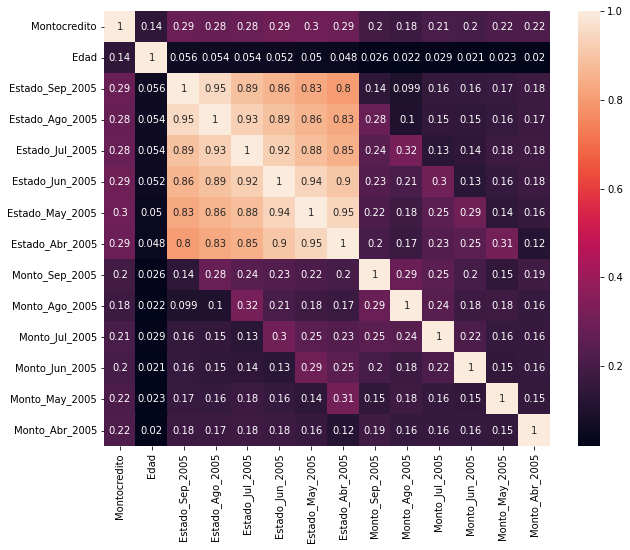

In [14]:
# Generamos un heatmap para visualizar la correlación entre los atributos
fig = plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True)

Ejercicio 7

Reduce las dimensiones con PCA

1.   Indica la varianza de los datos explicada por cada componente seleccionado. 
2.   Para actividades de exploración de los datos la varianza > 70%
3. Indica la importancia de las variables en cada componente




In [20]:
# Generamos el PCA
pcs = PCA()
pcs.fit(df.iloc[::].dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,2.432957,1.310005,1.022245,0.961779,0.940055,0.934203,0.882949,0.852433,0.840994,0.514242,0.266499,0.202647,0.159195,0.152459
Proportion of variance,0.422792,0.122575,0.074639,0.066071,0.063120,0.062336,0.055684,0.051901,0.050518,0.018888,0.005073,0.002933,0.001810,0.001660
Cumulative proportion,0.422792,0.545367,0.620006,0.686077,0.749196,0.811533,0.867216,0.919118,0.969635,0.988524,0.993596,0.996530,0.998340,1.000000


Nos quedaremos hasta el PC5, que su varianza acumulada es del 75%.

# **Ejercicio 8**

Elabora los histogramas de los atributos para visualizar su distribución

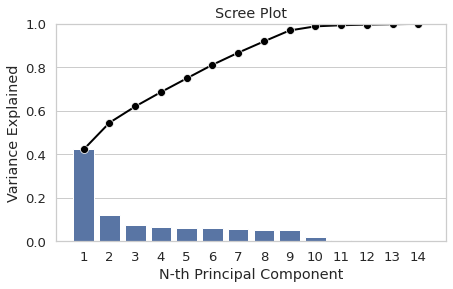

In [24]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(7, 4))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()



El primer componente principal tiene la mayor varianza posible

A su vez, cada componente sucesivo tiene la mayor varianza posible con la condición de que sea ortogonal a los componentes precedentes.

# **Ejercicio 9**

Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

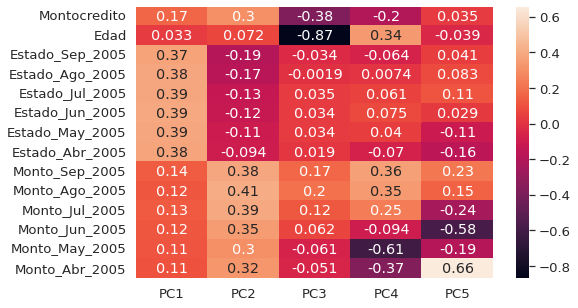

In [25]:
#Creamos una grafica de mapa de calor para identificar la relación entre las variables y los PCAs
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = df.iloc[::].columns
                                )
modelo= pcsComponents_df.iloc[:,:5]
modelo

fig = plt.figure(figsize=(8,5))
sns.heatmap(modelo, annot = True)

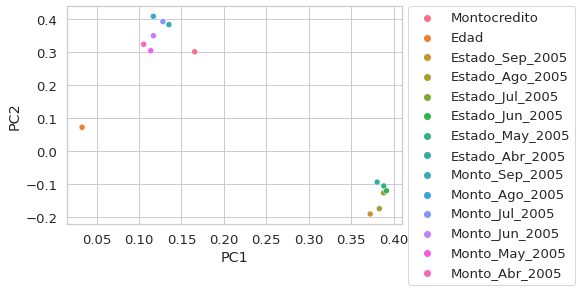

In [36]:
#Creamos una gráfica de dispersión para análizar los valores atípicos
sns.scatterplot(data=pcsComponents_df, x="PC1", y="PC2", hue=pcsComponents_df.index)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdc00c8ef10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdc00c919d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdc00c8e9d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fdc00c9a4d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fdc00c9aa10>,
 'means': []}

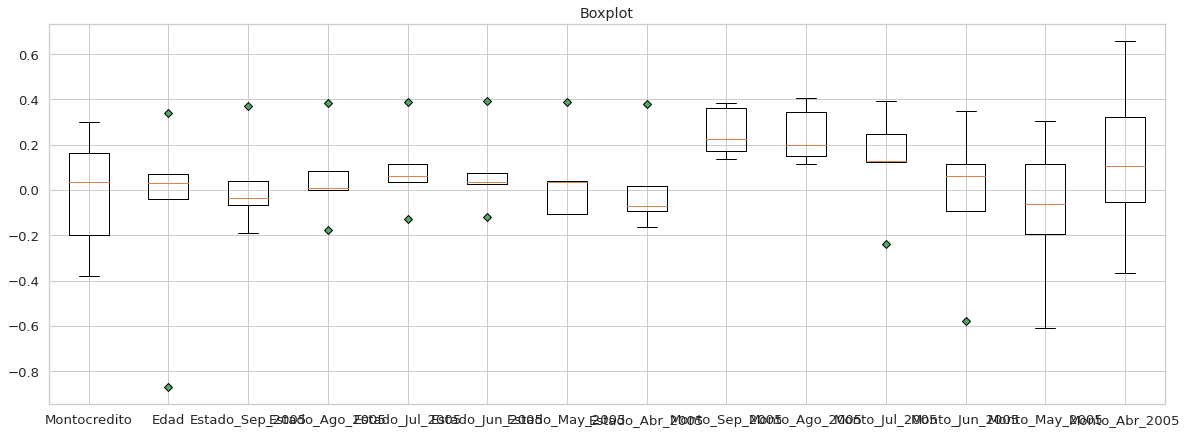

In [41]:
x = pcsComponents_df.index
x = x.to_list()
x

green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots(figsize=(20, 7))
ax.set_title('Boxplot')
ax.boxplot(modelo, flierprops=green_diamond, labels = x)

# **Ejercicio 10**

Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

Con la gráfica de mapa de calor podemos observar que variables tiene mayor y menor importancia en los componentes principales:

PC1:

Edad, Estado_Jun_2005

PC2:

Edad, Monto_Ago_2005

PC3:

Estado_Ago_2005, Edad

PC4:

Estado_Ago_2005, Monto_May_2005

PC5:

Estado_Jun_2005, Monto_Abr_2005

PC6:

Estado_Jun_2005, Monto_May_2005

PC7:

Estado_May_2005 Monto_Jul_2005

La edad es el valor atipico en la relación del PC1 y PC2